# CV Hw2 -- Problem2  AdaBoost

The following program realizes a vivid example to demonstrate the basic idea of AdaBoost. Weak classifiers here are vertical or horizontal lines.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random 
random.seed(5)

In [17]:
# train weak classifiers
def stumpClassifier(coor, label, D):
#   try_times is the number of tried weak classifiers(for each experiment)
    try_times = 100
    best_error = 1

    for i in range(try_times):
#       randomly choose the x or y axis weak classifier
        if random.random() >= 0.5:
#           if dimension = 0, a x=c(c is a random const) line will be chosen as a weak classifier
            dimension = 0
        else:
#           if dimension = 1, a y=c(c is a random const) line will be chosen as a weak classifier
            dimension = 1

#       randomly set a threshold(that is, the position of a weak classifier)
        max_coor = coor[:, dimension].max()
        min_coor = coor[:, dimension].min()
        threshold = (max_coor - min_coor) * random.random() + min_coor
        
#       randomly choose which side represents +1
        if random.random() >= 0.5:
            positive_side = 1
        else:
            positive_side = -1
            
        temp = coor[:, dimension]
        if positive_side == 1:
#           if positive_side == 1, the points >= threshold is +
            class_result = np.where(temp >= threshold, 1, -1)
        else:
#           if positive_side == -1, the points <= threshold is +
            class_result = np.where(temp <= threshold, 1, -1)
    
#       calculate the error
        compare = class_result == label
        compare = np.where(compare==False, 1, 0)
        error = np.sum((compare * D))
        
#       find the best weak classifier
        if error < best_error:
            best_error = error
            best_dimension = dimension
            best_positive_side = positive_side
            best_threshold = threshold
            best_class_result = class_result

    return best_error, best_dimension, best_positive_side, best_threshold, best_class_result

In [18]:
# Adaboost training framework
def adaboostTrain(X, y, iter):
#   initialize weights for samples
    weak_classifiers = []
    n = X.shape[0]
    D = np.ones((1, n)).astype(np.float64)
    D = D / n

    for i in range(iter):
#       train and find the best weak classifier
        best_error, best_dimension, best_positive_side, best_threshold, best_class_result = stumpClassifier(X, y, D)
#       calculate weights for weak classifiers
        alpha = 0.5 * math.log((1 - best_error) / best_error)
#       update weights for samples
        D = D * np.exp(-alpha * (y * best_class_result)) 
    
#       alpha refers the weight of each weak classifier; 
#       dimension refers the weak classifier is vertical or level;
#       threshold refers the position value of this weak classifier; 
#       positive_side refers which side of this weak classifier is +1;
        weak_classifiers += [[alpha, best_dimension, best_threshold, best_positive_side]]
        
    return weak_classifiers

In [19]:
# result of strong classifiers composed by weak classifiers
def adaClassifier(coordinates, weak_classifiers, T):
#   hypothesis is used to store the -1/1 classification of each points under three weak classifiers.
    hypothesis = []
    
    for i in range(T):
        dimension = weak_classifiers[i][1]
        threshold = weak_classifiers[i][2]
        positive_side = weak_classifiers[i][3]
#       "np.sign(coordinates[:, dimension] - threshold)" determines whether  
#       x/y coordinates is bigger than the weak classifier line.
#       "positive_side" determines which side is +1
        temp = positive_side * np.sign(coordinates[:, dimension] - threshold)
        hypothesis += [temp]
    
    hypothesis = np.array(hypothesis)
    
#   The weighted(each weak classifier's weight) average of weak classifiers
    alpha = [s[0] for s in weak_classifiers]
    alpha = np.array([alpha])
    
#   ada_class_result is a 10*1 matrixs, storing +1 or -1 label for each points
    ada_class_result = np.sign(np.dot(hypothesis.T, alpha.T))
    
    return ada_class_result

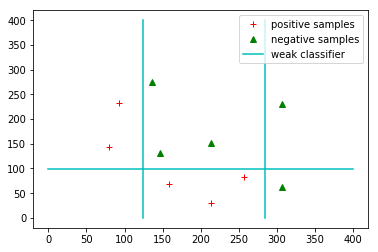

Comparision between labels and classify results by adaClassifier:
[[  80.  144.    1.    1.]
 [  93.  232.    1.    1.]
 [ 136.  275.   -1.   -1.]
 [ 147.  131.   -1.   -1.]
 [ 159.   69.    1.    1.]
 [ 214.   31.    1.    1.]
 [ 214.  152.   -1.   -1.]
 [ 257.   83.    1.    1.]
 [ 307.   62.   -1.   -1.]
 [ 307.  231.   -1.   -1.]]
Accuracy:
1.0


In [20]:
# iterations
T = 3

# 10 samples
samples = [[80,144,1],[93,232,1],[136,275,-1],[147,131,-1],[159,69,1],[214,31,1],[214,152,-1],[257,83,1],[307,62,-1],[307,231,-1]]
samples = np.array(samples)
coordinates = samples[:, 0:2]
labels = samples[:, 2]
positive_points = np.array([s for s,l in zip(coordinates,labels) if l == 1])
negative_points = np.array([s for s,l in zip(coordinates,labels) if l == -1])

# visualize sample points 
plt.figure()
plt.plot(positive_points[:,0], positive_points[:,1], 'r+', label='positive samples')
plt.plot(negative_points[:,0], negative_points[:,1], 'g^', label='negative samples')

# the information for each echos's best weak classifiers
weak_classifiers = adaboostTrain(coordinates, labels, T)

# visualize weak classifiers
for i in range(T-1):
    threshold = weak_classifiers[i][2]
    dimension = weak_classifiers[i][1]

    if dimension == 0:
        plt.plot([threshold, threshold], [0, 400], 'c') 
    else: 
        plt.plot([0, 400], [threshold, threshold], 'c')

threshold = weak_classifiers[i+1][2]
dimension = weak_classifiers[i+1][1]
if dimension == 0:
    plt.plot([threshold, threshold], [0, 400], 'c', label='weak classifier') 
else: 
    plt.plot([0, 400], [threshold, threshold], 'c', label='weak classifier')
        
plt.legend(loc='upper right')
plt.savefig('AdaboostDemo.png')
plt.show()


# show the results of classification and accuracy
ada_class_result = adaClassifier(coordinates, weak_classifiers, T)
ada_class_result = np.array(ada_class_result)

print('Comparision between labels and classify results by adaClassifier:')
print(np.hstack((samples, ada_class_result)))
# statistic the right classified number
compare = samples[:, 2] == labels
compare = np.where(compare==True, 1, 0)
right_num = np.sum((compare))
print('Accuracy:')
print(right_num / samples.shape[0])